<font color = green >

# <center>Homework<center>
</font>

__Exploratory Data Analysis (EDA)__ of car insurance dataset.
    
__Dataset description:__ Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.    

__Steps:__

- 1) Data Cleaning
- 2) Descriptive Statistics
- 3) Data Visualization
- 4) Conclusions

DUIS - Driving Under the Influence

<font color = green >

# <center>Task 1<center>
<center>Data clearing<center>
</font>

In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv("E:\\University\\Інше\\IV Amazinum Data Science Camp\\Lecture 4\\Car_Insurance_Claim.csv")

df = df.drop('Unnamed: 0', axis=1)
df = df.drop('ID', axis=1)
df.replace(to_replace='none', value=np.nan, inplace=True)

df = df.dropna(how='all')  

missing_values = df.isna().sum() #просумували всі рядки у яких нічого нема і виводимо суму
print('mising value:\n',missing_values)

df.head()

mising value:
 AGE                     100
GENDER                   99
RACE                     99
DRIVING_EXPERIENCE      100
EDUCATION              1996
INCOME                    0
CREDIT_SCORE           1072
VEHICLE_OWNERSHIP       100
VEHICLE_YEAR            100
MARRIED                  98
CHILDREN                100
POSTAL_CODE             100
ANNUAL_MILEAGE         1050
VEHICLE_TYPE             99
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
dtype: int64


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,NaN,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,NaN,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,NaN,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


<font color = green >

# <center>Task 2<center>
<center>Descriptive Statistics<center>
</font>

In [32]:
description = df.describe()
description

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9900,9901,9901,9900,8004,10000,8928,9900,9900,9902,9900,9900,8950,9901,9901,9900,9900,9900
unique,4,2,2,4,2,4,8928,2,2,2,2,8,21,2,21,7,15,2
top,26-39,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
freq,3035,4968,8919,3503,4116,4336,1,6907,6896,4972,6815,6223,1244,9432,4978,8041,5528,6795


<font color = green >

# <center>Task 3<center>
<center>Data Visualization<center>
</font>

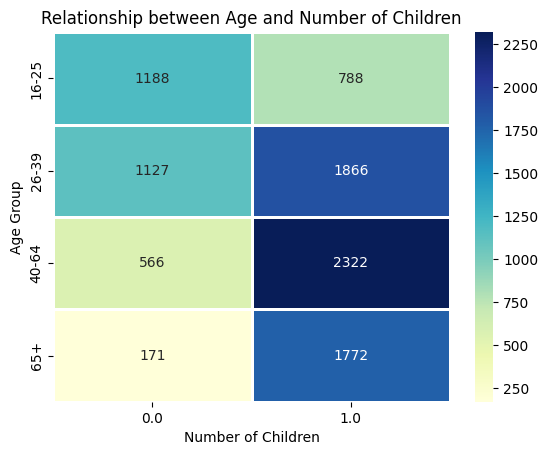

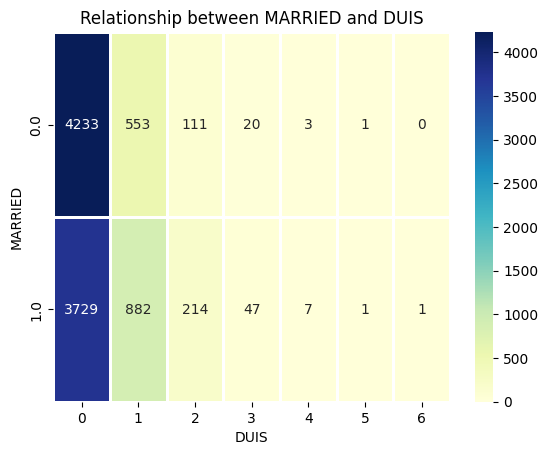

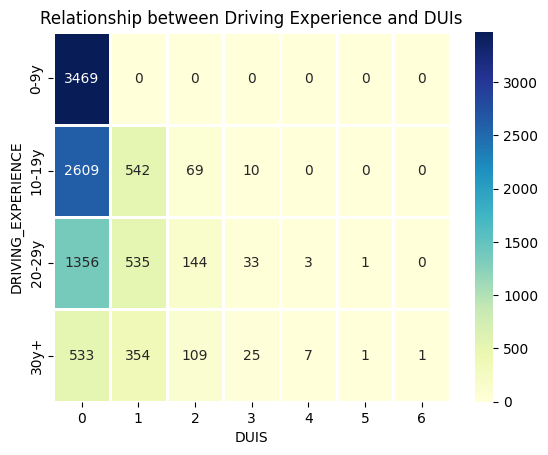

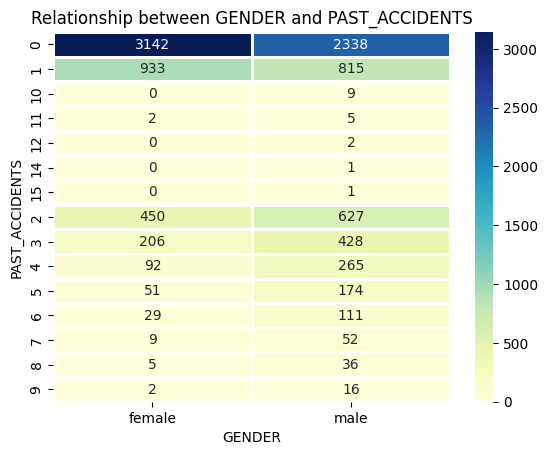

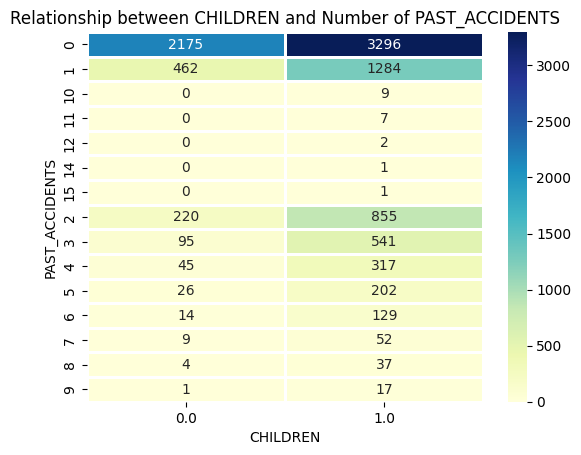

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Відношення між кількістю років і дітей
pivot_table = df.pivot_table(index='AGE', columns='CHILDREN', aggfunc='size', fill_value=0)
pivot_table = pivot_table.rename(index={16: '16-25', 26: '26-39', 40: '40-64', 65: '65+'})
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=1, linecolor='white')
plt.title('Relationship between Age and Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Age Group')
plt.show()

# Відношення MARRIED до DUIS
pivot_table = df.pivot_table(index='MARRIED', columns='DUIS', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=1, linecolor='white')
plt.title('Relationship between MARRIED and DUIS')
plt.show()

# Відношення DRIVING_EXPERIENCE до DUIS
pivot_table = df.pivot_table(index='DRIVING_EXPERIENCE', columns=['DUIS'], aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=1, linecolor='white')
plt.title('Relationship between Driving Experience and DUIs')
plt.show()

# Відношення PAST ACCIDENTS до GENDER
pivot_table = df.pivot_table(index='PAST_ACCIDENTS', columns=['GENDER'], aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=1, linecolor='white')
plt.title('Relationship between GENDER and PAST_ACCIDENTS')
plt.show()

# Відношення між PAST ACCIDENTS і CHILDREN
pivot_table = df.pivot_table(index='PAST_ACCIDENTS', columns='CHILDREN', aggfunc='size', fill_value=0)
pivot_table = pivot_table.rename(index={16: '16-25', 26: '26-39', 40: '40-64', 65: '65+'})
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=1, linecolor='white')
plt.title('Relationship between CHILDREN and Number of PAST_ACCIDENTS')
plt.show()

<font color = green >

# <center>Task 4<center>
<center>Conclusion<center>
</font>

<font color = blue size="5">
Based on the visualized data, it can be concluded that the majority of children belong to individuals aged 40 years, with young population coming in second place.
It was also observed that married individuals are less likely to drive under the influence, and that the highest number of intoxicated drivers have limited driving experience.
Furthermore, it was noted that women are less likely to be involved in road accidents compared to men, and that individuals with children are less frequently involved in accidents.
</font>
